#### karateclub's Non-Overlapping Community Detection  
GEMSEC (ASONAM 2019)  
EdMot (KDD 2019)   
SCD (WWW 2014)   
Label Propagation (Physics Review E 2007)  
examples: https://github.com/benedekrozemberczki/karateclub/tree/master/examples/community_detection

In [1]:
import networkx as nx
import time
import matplotlib.pyplot as plt
from karateclub.community_detection.non_overlapping import GEMSEC, SCD, LabelPropagation, EdMot
from utils import load_edgelist_graph,load_ordered_adjlist_graph
from evaluation import symmetric_matrix_modularity

#### graph

In [2]:
name = 'bio72'

print('begin time:{}'.format(time.asctime(time.localtime(time.time()))))   
adjlist_graph_path = './graphs/' + name + '.adjlist'
G = load_ordered_adjlist_graph(adjlist_graph_path)
print('graph reading over time:{}'.format(time.asctime(time.localtime(time.time()))))   

begin time:Sun Apr 25 12:47:59 2021
initial G nodes 25023,edges 968659
after G nodes 25023,edges 993682
graph reading over time:Sun Apr 25 12:48:12 2021


#### train

training over time:Sun Apr 25 16:49:29 2021


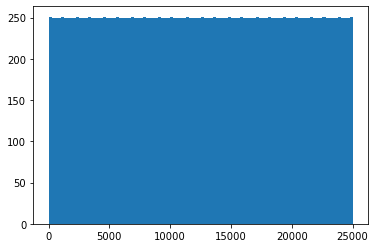

In [3]:
model = GEMSEC()

print(model)
model.fit(G)
y_pred = model.get_memberships()
plt.hist(y_pred, 100)
print('training over time:{}'.format(time.asctime(time.localtime(time.time())))) 

#### evaluate

In [4]:
print(f'\nFinal symmetric_matrix_modularity = {symmetric_matrix_modularity(G, y_pred):.8f}')
print('evaluae modularity over time:{}'.format(time.asctime(time.localtime(time.time()))))   

number of edges:993682.0
i:233,node_i:233
modularity running node:25022,now 2*m*modularity:52842.42734413
Final symmetric_matrix_modularity = 0.05317331
evaluae modularity over time:Sun Apr 25 17:11:40 2021


In [5]:
comm2count = {}
for i in range(25023):
    if y_pred[i] in comm2count:
        comm2count[y_pred[i]] += 1
    else:
        comm2count[y_pred[i]] = 1
print('number of communities: {}'.format(len(comm2count)))
for ky in comm2count.keys():
    print('community {:5d} count {:5d}'.format(ky, comm2count[ky]))

number of communities: 10
community     3 count 23985
community     1 count    18
community     8 count   371
community     0 count   196
community     5 count   304
community     9 count    24
community     7 count    30
community     4 count    22
community     2 count    52
community     6 count    21
